<h1><center>IMDB Movie Case Study</center></h1>

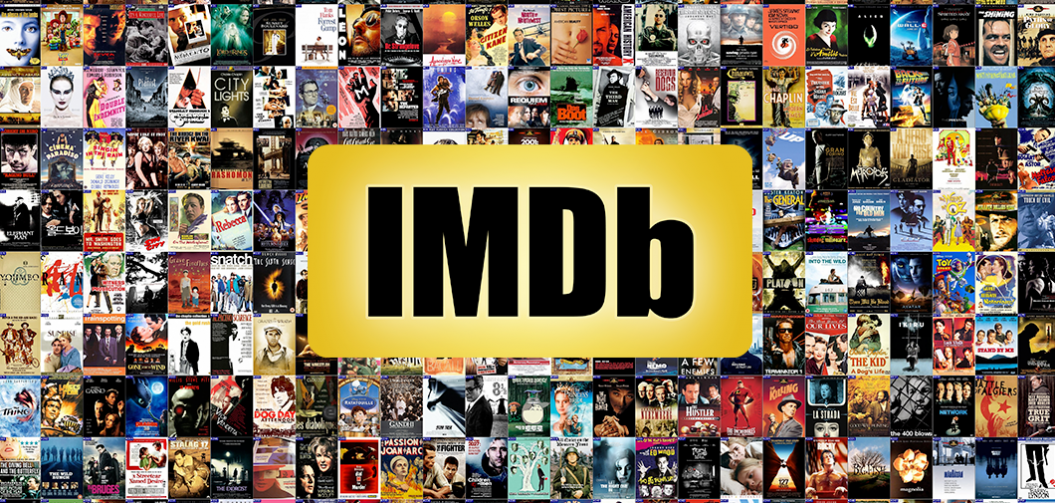

## Importing the Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import re 
import plotly.express as px
import plotly.graph_objs as go
import plotly.colors as colors
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the Dataset

In [3]:
df = pd.read_csv("D:\Python miscellaneous\Imdb_movie(EDA)\IMDB-Movie-Data.csv")

## Inspecting the Dataset

In [4]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


- #### **Displaying the first 5 rows of the dataset**

In [5]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


- #### **Displaying the last 5 rows of the dataset**

In [6]:
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


- #### **Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [7]:
df.shape
print("The Number of rows in the dataset are:",df.shape[0])
print("The Number of columns in the dataset are:",df.shape[1])

The Number of rows in the dataset are: 1000
The Number of columns in the dataset are: 12


- #### **Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


- ####  **Geting the overall Statistics about the DataFrame**

In [9]:
#describe() method return description of the data in the DataFrame(i.e count,mean,std,min..etc)--only for numeric columns
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [10]:
df.describe(include='object')

,Title,Genre,Description,Director,Actors
count,1000,1000,1000,1000,1000
unique,999,207,1000,644,996
top,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,2,50,1,8,2


- #### **Inspect Missing Values in the Dataset**

In [11]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

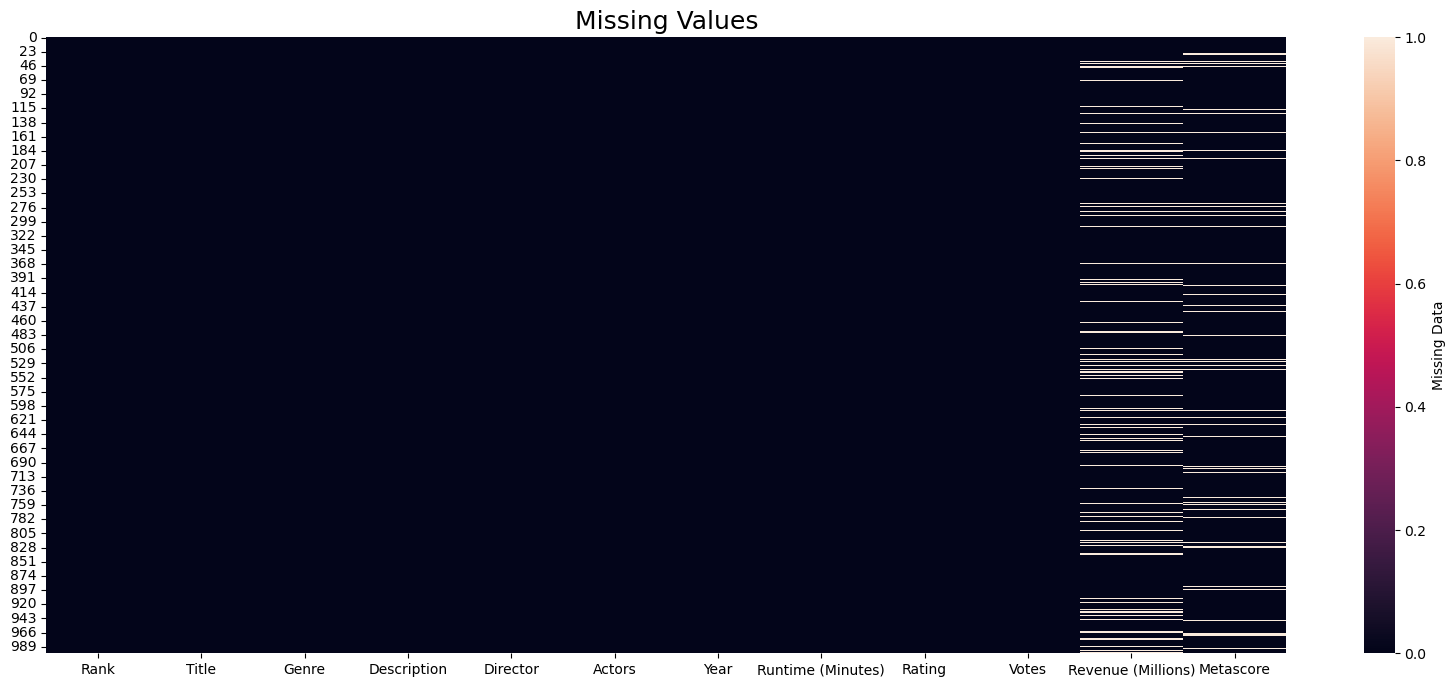

In [12]:
#visualizing missing values using seaborn Heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),
            cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values', fontsize=18)
plt.show()

- #### **Drop All The  Missing Values**

In [13]:
df.shape

(1000, 12)

In [14]:
df = df.dropna(axis = 0)

In [15]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [16]:
df.shape

(838, 12)

- #### **Finding Duplicate values**

In [17]:
df[df.duplicated()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


In [18]:
df.duplicated().sum()
print('The dataset has',df.duplicated().sum(),'duplicate values.')

The dataset has 0 duplicate values.


- #### **Understanding the variables**

In [19]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

## **Variable description:**
- **`Rank`**: The ranking or position of the movie in the IMDb movie database. It is based on some criteria, such as IMDb rating, number of votes, or revenue.

- **`Title`**: The title or name of the movie. This column contains the names of all the movies listed in the IMDb database.

- **`Genre`**: The genre or category of the movie. It represents the type of movie, such as action, drama, comedy, sci-fi, etc. A movie can have multiple genres separated by commas.

- **`Description`**: A brief summary or description of the movie's plot. This column provides a short overview of the storyline or main theme of the movie.

- **`Director`**: The name of the director(s) who directed the movie. This column lists the individuals responsible for guiding the production and creative aspects of the film.

- **`Actors`**: The names of the main actors and actresses who played significant roles in the movie. It usually includes the leading cast members.

- **`Year`**: The year when the movie was released. This column represents the release year of the film.

- **`Runtime (Minutes)`**: The duration of the movie in minutes. It indicates the total running time of the movie.

- **`Rating`**: The IMDb rating of the movie. It represents the average user rating given to the movie on IMDb's rating scale, usually ranging from 1 to 10.

- **`Votes`**: The number of votes received by the movie on IMDb. It indicates the total count of user votes.

- **`Revenue (Millions)`**: The revenue generated by the movie in millions of dollars. This column represents the total box office earnings of the movie.

- **`Metascore`**: The Metascore rating of the movie. Metascore is a weighted average of critics' reviews for the movie, usually on a scale of 0 to 100.

## Data Wrangling

- #### **Make a copy of the original dataset before making any modifications**

In [20]:
df1 =df.copy()

In [21]:
df1

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


### `Q.1 In which year were the maximumn movies released?`

In [22]:
df1.Year.value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

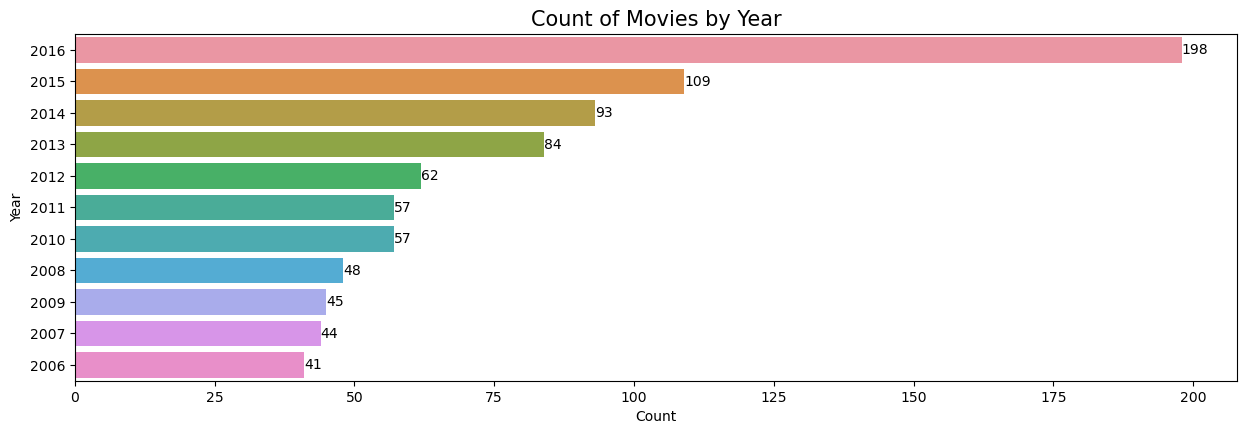

In [27]:
#visualizing values using seaborn Barplot.
plt.figure(figsize=(15,4.5))
ax=sns.barplot(x=df1.Year.value_counts() ,y = df1.Year.value_counts().index, data=df1, orient ='h',order = df1.Year.value_counts().index[0:])
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Count of Movies by Year',fontsize = 15)
for bars in ax.containers:
    ax.bar_label(bars)

### `Q.2 Count of Individual Genre?`

In [28]:
genre_counts = df1['Genre'].str.split(',').explode().value_counts()
genre_counts

Drama        419
Action       277
Comedy       250
Adventure    244
Thriller     148
Crime        126
Romance      120
Sci-Fi       107
Fantasy       92
Horror        87
Mystery       86
Biography     67
Family        48
Animation     45
History       25
Music         15
Sport         15
War           10
Musical        5
Western        4
Name: Genre, dtype: int64

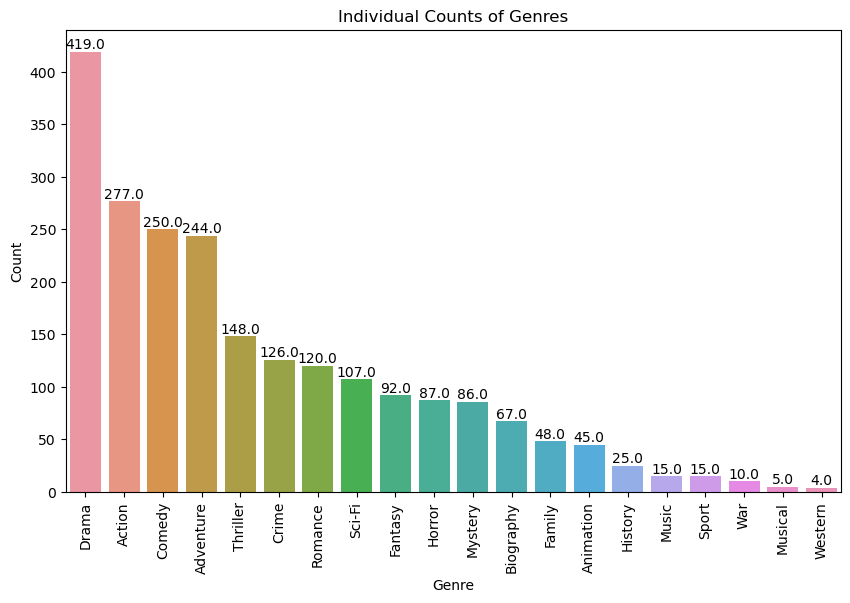

In [32]:
##visualizing values using seaborn Barplot.
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values)
ax.set(xlabel='Genre', ylabel='Count', title='Individual Counts of Genres')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

### `Q.3 Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes`

In [33]:
df1.columns
df1[df['Runtime (Minutes)']>=180][['Title','Runtime (Minutes)']]

,Title,Runtime (Minutes)
82,The Wolf of Wall Street,180
88,The Hateful Eight,187
311,La vie d'Adèle,180


### `Q.4 In Which Year There Was The Highest Voting?`

In [34]:
df1.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [35]:
voting_by_year = df1.groupby('Year')['Votes'].sum().sort_values(ascending=False)
voting_by_year

Year
2014    19709200
2013    18944679
2012    18033412
2010    14881727
2011    14777520
2015    14116879
2016    13550689
2008    12795847
2009    12023126
2007    11727351
2006    11366521
Name: Votes, dtype: int64

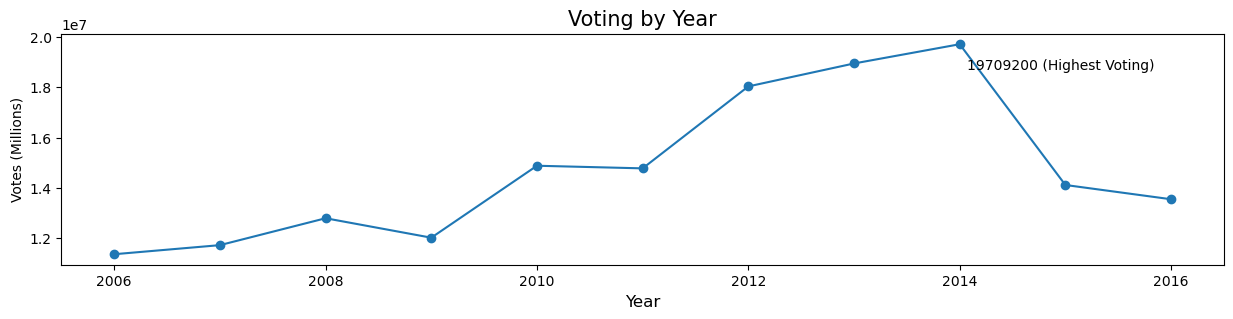

In [36]:
voting_by_year = df.groupby('Year')['Votes'].sum()
# Find the year with the highest voting
year_with_highest_voting = voting_by_year.idxmax()
max_vote = voting_by_year.max()

# Plotting the line chart
plt.figure(figsize=(15, 3))
plt.plot(voting_by_year.index, voting_by_year.values, marker='o')
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Votes (Millions)',)
plt.title('Voting by Year',fontsize = 15)

# Adding data labels to the line point with the highest voting
plt.annotate(f"{max_vote} (Highest Voting)", (year_with_highest_voting, max_vote),
             xytext=(5, -10), textcoords='offset points', ha='left', va='top')
plt.show()

### `Q.5 In Which Year There Was The Highest Average Revenue?`

In [37]:
df1.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

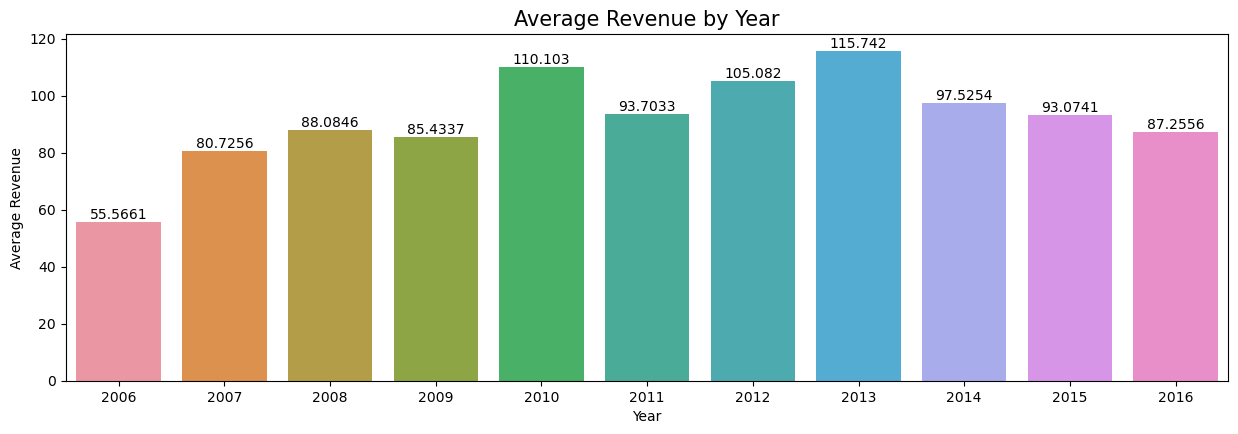

In [39]:
# Calculate the average revenue for each year
average_revenue_by_year = df1.groupby('Year')['Revenue (Millions)'].mean()
# Plot the bar graph to visualize average revenue for each year
plt.figure(figsize=(15,4.5))
ax=sns.barplot(x=df1.Year.value_counts().index ,y = average_revenue_by_year.values, data=df1)
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Year',fontsize = 15)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### `Q.6  Find The Average Rating For Each Director ?`

In [40]:
df1.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [41]:
df1.groupby('Director')['Rating'].mean().sort_values(ascending = False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

### `Q.7 Display Top 10 Lengthy Movies Title and Runtime?`

In [42]:
# Sort the DataFrame by 'Runtime' in descending order
sorted_df = df1.sort_values('Runtime (Minutes)', ascending=False)

# Select the top 10 lengthy movies
top_10_lengthy_movies = sorted_df.head(10)[['Title', 'Runtime (Minutes)']]
top_10_lengthy_movies

,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
75,Pirates of the Caribbean: At World's End,169
36,Interstellar,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
126,Transformers: Age of Extinction,165


In [63]:
# Generate shades of blue
num_movies = len(top_10_lengthy_movies)
color_scale = colors.sequential.Blues

# Create the donut chart using plotly.graph_objs
fig = go.Figure(data=[go.Pie(labels=top_10_lengthy_movies['Title'],
                             values=top_10_lengthy_movies['Runtime (Minutes)'],
                             hole=0.5,
                             marker=dict(colors=color_scale[:num_movies]))])

# Set the title and layout
fig.update_layout(title='Top 10 Lengthy Movies Title and Runtime',
                  annotations=[dict(text='Runtime', x=0.5, y=0.5, font_size=20, showarrow=False)])

# Show the chart
fig.show()

### `Q.8 Display Number of Movies Per Year?`

In [47]:
df1.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

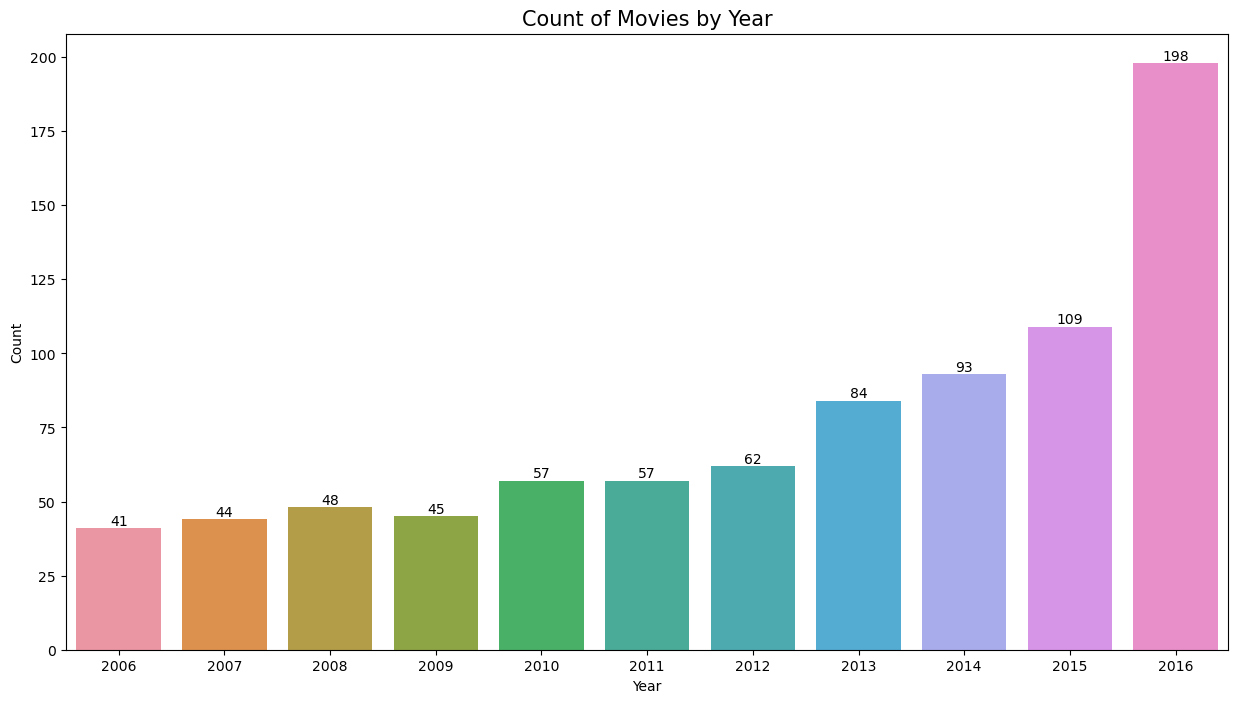

In [36]:
# Visualizing using Seaborn Barplot
plt.figure(figsize=(15,8))
ax=sns.barplot(x=df1.Year.value_counts().index ,y = df1.Year.value_counts(), data=df1)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Movies by Year',fontsize = 15)
for bars in ax.containers:
    ax.bar_label(bars)

### `Q.9 Find Most Popular Movie Title (Highest Revenue)?`

In [48]:
df1[df1['Revenue (Millions)'].max() == df1['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

### `Q.10 Display Top 10 Highest Rated Movie Titles And its Directors`

In [49]:
# Sort the DataFrame by 'Rating' in descending order
sorted_df = df1.sort_values('Rating', ascending=False)

# Select the top 10 highest-rated movies
top_10_highest_rated = sorted_df.head(10)

# Create the radial column chart
fig = go.Figure(go.Barpolar(
    r=top_10_highest_rated['Rating'],
    theta=top_10_highest_rated['Title'],
    text=top_10_highest_rated['Director'],
    marker=dict(
        color=top_10_highest_rated['Rating'],
        coloraxis='coloraxis',
    )
))

# Set the layout and title
fig.update_layout(
    title='Top 10 Highest-Rated Movies',
    polar=dict(
        angularaxis=dict(
            direction='clockwise'
        ),
        radialaxis=dict(
            visible=True,
            range=[0, max(top_10_highest_rated['Rating']) + 1],
        )
    ),
    coloraxis=dict(
        colorscale='Blues',
        colorbar=dict(
            title='Rating',
            ticksuffix=' / 10',
            lenmode='fraction',
            len=0.75,
        )
    )
)

# Show the chart
fig.show()

### `Q.11 Display Top 10 Highest Revenue Movie Titles`

In [50]:
top_10_highest_revenue = df.sort_values('Revenue (Millions)', ascending=False).head(10)[['Title', 'Revenue (Millions)']]
print(top_10_highest_revenue)

                                          Title  Revenue (Millions)
50   Star Wars: Episode VII - The Force Awakens              936.63
87                                       Avatar              760.51
85                               Jurassic World              652.18
76                                 The Avengers              623.28
54                              The Dark Knight              533.32
12                                    Rogue One              532.17
119                                Finding Dory              486.29
94                      Avengers: Age of Ultron              458.99
124                       The Dark Knight Rises              448.13
578             The Hunger Games: Catching Fire              424.65


In [40]:
# Sort the DataFrame by 'Revenue (Millions)' in descending order
sorted_df = df1.sort_values('Revenue (Millions)', ascending=False)

# Select the top 10 highest revenue movies
top_10_highest_revenue = sorted_df.head(10)

# Create the bubble plot with colors
fig = px.scatter(top_10_highest_revenue, x='Rating', y='Revenue (Millions)',
                 size='Revenue (Millions)', color='Genre', hover_name='Title',
                 color_discrete_sequence=px.colors.qualitative.Pastel)

# Set the layout and title
fig.update_layout(
    title='Top 10 Highest Revenue Movies (Bubble Plot)',
    xaxis_title='Rating',
    yaxis_title='Revenue (Millions)',
)

# Show the chart
fig.show()

### `Q.12 Find Average Rating of Movies Year Wise`

In [41]:
average_rating_yearwise = df1.groupby('Year')['Rating'].mean().reset_index()[['Year', 'Rating']]
average_rating_yearwise

,Year,Rating
0,2006,7.143902
1,2007,7.140909
2,2008,6.708333
3,2009,6.911111
4,2010,6.894737
5,2011,6.945614
6,2012,6.933871
7,2013,6.832143
8,2014,6.822581
9,2015,6.674312


## `Q.13 Does Rating Affect The Revenue?`

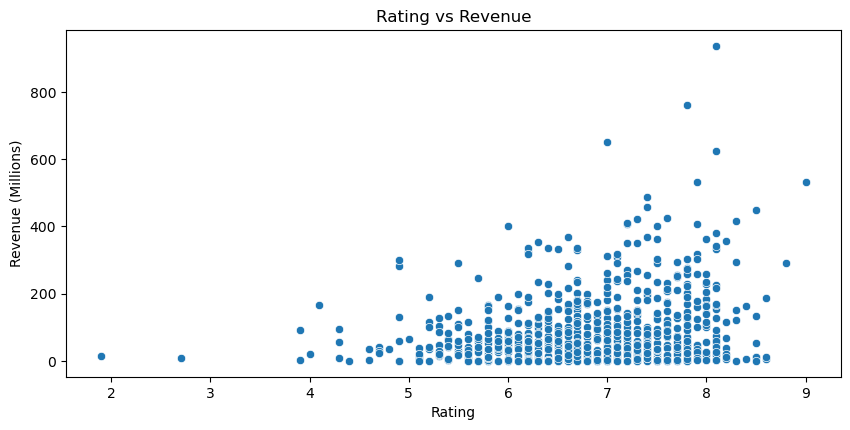

In [53]:
plt.figure(figsize=(10,4.5))
sns.scatterplot(x = 'Rating',y = 'Revenue (Millions)', data = df1 )
plt.title("Rating vs Revenue")
plt.show()

### `Q.14 Classify Movies Based on Ratings [Excellent, Good, and Average]`

In [54]:
df1.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [55]:
def rating_category(rating):
    if rating>=7.0:
        return 'Excellent'
    elif rating>=6.0:
        return 'Good'
    else:
        return 'Average'

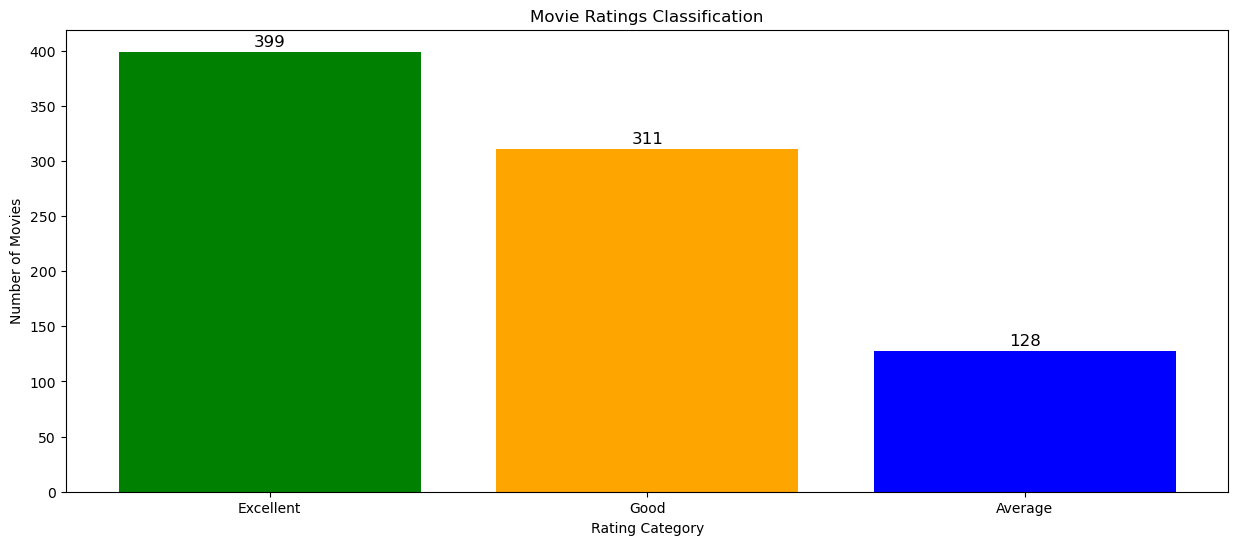

In [57]:
# Classify movies based on ratings
df1['Rating Category'] = df1['Rating'].apply(rating_category)

# Count the number of movies in each category
category_counts = df1['Rating Category'].value_counts()

# Data for visualization
categories = category_counts.index
counts = category_counts.values

# Plot the bar chart
plt.figure(figsize=(15,6))
plt.bar(categories, counts, color=['green', 'orange', 'blue'])
plt.xlabel('Rating Category')

plt.ylabel('Number of Movies')

plt.title('Movie Ratings Classification')

# Adding data labels to the bar plot
for i in range(len(categories)):
    plt.text(x=categories[i], y=counts[i] + 5, s=str(counts[i]), ha='center', fontsize =12)
plt.show()